In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
cityDataDF = pd.read_csv(city_data_to_load)
rideDataDF = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
dataDF = rideDataDF.merge(cityDataDF, on='city', how='left')
dataDF.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


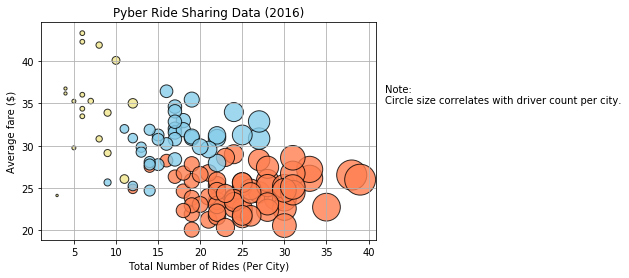

In [2]:
dfg = dataDF.groupby(['type', 'city'])
Count = dfg.count().reset_index()
Count.rename(columns={'ride_id':'RideCount'}, inplace=True)
Average = dfg.mean().reset_index()
Average.rename(columns={'fare':'AverageFare'}, inplace=True)
Average.rename(columns={'type':'Type'}, inplace=True)
resultDF = Count.merge(Average,on='city')
urbanColor = 'coral'
ruralColor = 'khaki'
subColor = 'skyblue'
scale = 2 * np.pi * 0.1

pV = resultDF[resultDF.Type == 'Urban']
plt.scatter(pV['RideCount'], pV['AverageFare'],  s = scale*pV['driver_count_x']**2, color = urbanColor, edgecolor = 'black', label = 'Urban', alpha = .8)
pV = resultDF[resultDF.Type == 'Rural']
plt.scatter(pV['RideCount'], pV['AverageFare'],  s = scale*pV['driver_count_x']**2, color = ruralColor, edgecolor = 'black', label = 'Urban', alpha = .8)
pV = resultDF[resultDF.Type == 'Suburban']
plt.scatter(pV['RideCount'], pV['AverageFare'],  s = scale*pV['driver_count_x']**2, color = subColor, edgecolor = 'black', label = 'Urban', alpha = .8)

#plt.legend()
#lgnd = plt.legend(frameon = True, edgecolor = 'black', title = 'City Types')
#plt.legend(title="City Types", loc="best", framealpha=0)
plt.text(42, 35,"Note:\nCircle size correlates with driver count per city.")
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average fare ($)")
plt.grid(True)
plt.savefig('PyRideSharingData.svg', orientation='landscape', format='svg', transparent=True,frameon=False)
plt.show()


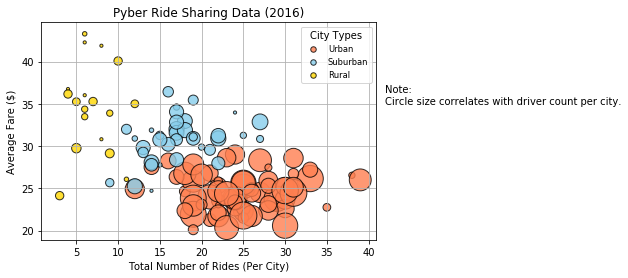

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


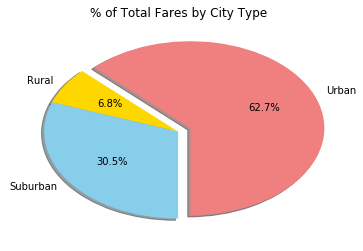

In [3]:
data = []
data.append (['Urban', dataDF[dataDF.type == 'Urban'].sum().fare])
data.append (['Rural', dataDF[dataDF.type == 'Rural'].sum().fare])
data.append (['Suburban', dataDF[dataDF.type == 'Suburban'].sum().fare])
df=pd.DataFrame(data)
df.columns=['Type', 'TotalFare']
df['Percentage'] = df.TotalFare/df.TotalFare.sum()*100
plt.figure()
plt.title("% of Total Fares by City Type")
plt.pie(df['Percentage'], 
        startangle=270, 
        colors=['lightcoral','gold', 'skyblue'], 
        autopct='%1.1f%%',
        labels = df.Type,
        shadow=True,
        explode=(0.1,0,0)
       )
plt.savefig('PyRideShareTotalFaresByCity', orientation='landscape', format='svg', transparent=True,frameon=False)
plt.show()

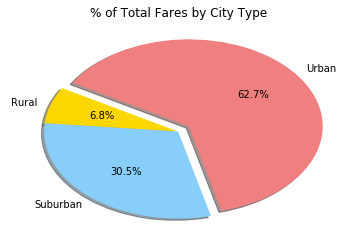

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


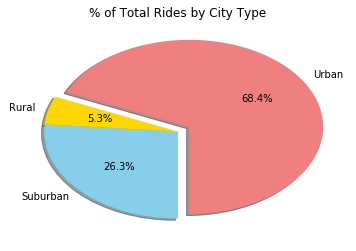

In [4]:
data = []
data.append (['Urban', dataDF[dataDF.type == 'Urban'].count().type])
data.append (['Rural', dataDF[dataDF.type == 'Rural'].count().type])
data.append (['Suburban', dataDF[dataDF.type == 'Suburban'].count().type])
df=pd.DataFrame(data)
df.columns=['Type', 'Count']
df['Percentage'] = df.Count/df.Count.sum()*100
plt.figure()
plt.title("% of Total Rides by City Type")
plt.pie(df['Percentage'], 
        startangle=270, 
        colors=['lightcoral','gold', 'skyblue'], 
        autopct='%1.1f%%',
        labels = df.Type,
        shadow=True,
        explode=(0.1,0,0)
       )
plt.savefig('PyRideShareTotalRidesByCity', orientation='landscape', format='svg', transparent=True,frameon=False)
plt.show()

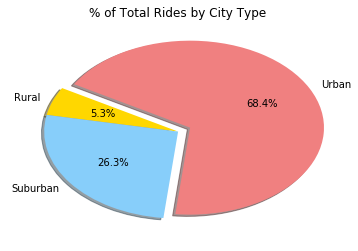

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


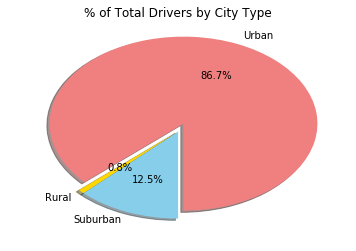

In [5]:
data = []
data.append (['Urban', dataDF[dataDF.type == 'Urban'].sum().driver_count])
data.append (['Rural', dataDF[dataDF.type == 'Rural'].sum().driver_count])
data.append (['Suburban', dataDF[dataDF.type == 'Suburban'].sum().driver_count])
df=pd.DataFrame(data)
df.columns=['Type', 'TotalDrivers']
df['Percentage'] = df.TotalDrivers/df.TotalDrivers.sum()*100
plt.figure()
plt.title("% of Total Drivers by City Type")
plt.pie(df['Percentage'], 
        startangle=270, 
        colors=['lightcoral','gold', 'skyblue'], 
        autopct='%1.1f%%',
        labels = df.Type,
        shadow=True,
        explode=(0.1,0,0)
       )
plt.show()

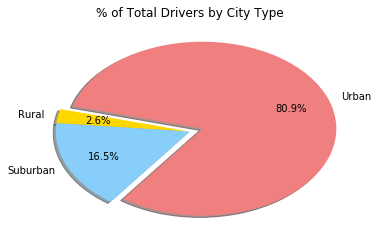

In [6]:
# Show Figure
plt.show()